In [1]:
import math
from scipy.integrate import quad, fixed_quad
import matplotlib.pyplot as plt
import pickle 
import numpy as np
import functools
import sys 
from tqdm import tqdm, trange
from utils import *
from classy import Class

import math
from matplotlib import pyplot as plt
leave_out_box = sys.argv[1]
print('Leaving out', leave_out_box)

cosmos_f = open('data/cosmo_params.pkl', 'rb')
cosmo_params = pickle.load(cosmos_f) #cosmo_params is a dict
cosmos_f.close()

a_list_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/alist.pkl'
a_list_f = open(a_list_fname, 'rb')
a_list = pickle.load(a_list_f) 
a_list_f.close()
print('alist', a_list)

weird_boxes = ['Box63_1400', 'Box35_1400', 'Box_n50_38_1400', 'Box5_1400']

Leaving out -f
alist [1.0, 0.953321, 0.866399, 0.787402, 0.715608, 0.65036, 0.620002, 0.591061, 0.563471, 0.537169, 0.512095, 0.488191, 0.403224, 0.366459]


In [2]:
Y = []
z_to_a = {}
a_to_z = {}
kt = np.logspace(-3, 1, 100) # h/Mpc
for box in tqdm(cosmo_params):
    if(box in weird_boxes):
        continue
    curr_cosmo = cosmo_params[box]
    curr_cosmo_values = list(curr_cosmo.values())
    
    for a in a_list:
        z = scaleToRedshift(a)
        z_to_a[z] = a
        a_to_z[a] = z
        with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_params.pkl"%(box, a), "rb") as f:
            MLE_params = pickle.load(f)
            param_values = list(MLE_params.values())
            Y+= [param_values]


100%|██████████| 150/150 [00:00<00:00, 215.58it/s]


In [3]:
Y = np.array(Y)

In [4]:
Y.shape

(2044, 4)

In [5]:
import corner

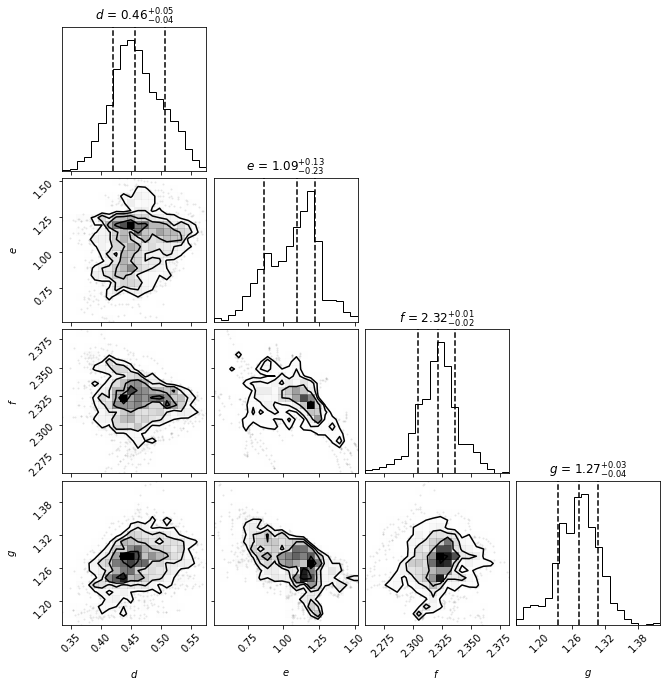

In [6]:
figure = corner.corner(Y,
                      labels=[
        r"$d$",
        r"$e$",
        r"$f$",
        r"$g$",
    ],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
)

In [7]:
import numpy as np

class Standardizer:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        if self.mean is None or self.std is None:
            raise ValueError("Standardizer has not been fitted. Call fit() first.")
        
        return (X - self.mean) / self.std

    def inverse_transform(self, X_std):
        if self.mean is None or self.std is None:
            raise ValueError("Standardizer has not been fitted. Call fit() first.")
        
        return X_std * self.std + self.mean

In [8]:
# Create a standardizer object
standardizer = Standardizer()

# Fit the standardizer to the input data
standardizer.fit(Y)

# Standardize the input data
Y_std = standardizer.transform(Y)

# Apply inverse transform to obtain the original data
Y_original = standardizer.inverse_transform(Y_std)

In [9]:
np.allclose(Y_original, Y)

True

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(Y)

# Standardize the data
Y_std2 = scaler.transform(Y)


In [11]:
np.allclose(Y_std, Y_std2)

True

In [12]:
Y_std

array([[ 1.24919456, -0.17547412,  0.0156152 ,  1.3244759 ],
       [ 1.01787597, -0.44968548, -0.05100193,  1.46355727],
       [ 0.60072291, -0.77141766,  0.0275755 ,  1.66991379],
       ...,
       [-0.55016691,  0.79599153, -0.71754524, -0.04505546],
       [-0.85548866,  0.8157994 , -0.75704901, -0.13866746],
       [-0.88948852,  0.84163562, -0.84898834, -0.11951575]])

In [13]:
[1,2,3,4]

[1, 2, 3, 4]

In [14]:
standardizer.inverse_transform([1,2,3,4])

array([0.50242441, 1.42683219, 2.37524002, 1.42408735])

In [15]:
standardizer.inverse_transform([[1,2,3,4],[1,2,3,4]])

array([[0.50242441, 1.42683219, 2.37524002, 1.42408735],
       [0.50242441, 1.42683219, 2.37524002, 1.42408735]])

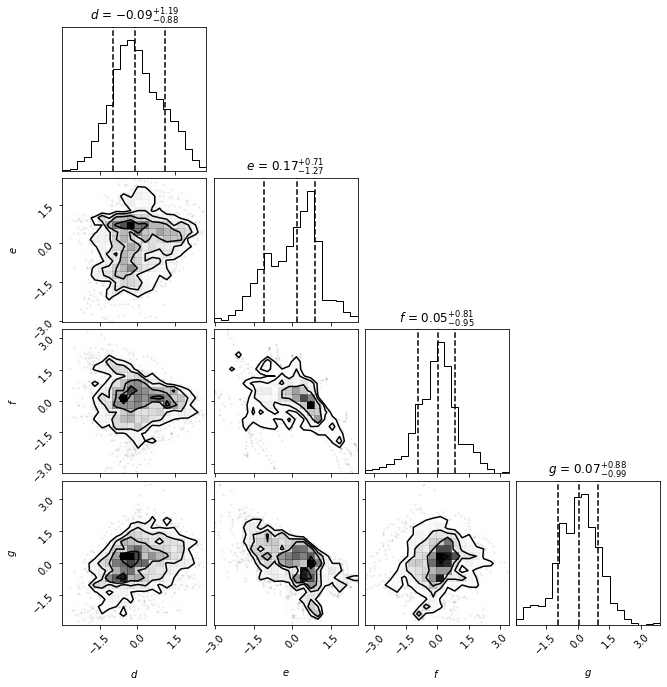

In [18]:
figure = corner.corner(Y_std,
                      labels=[
        r"$d$",
        r"$e$",
        r"$f$",
        r"$g$",
    ],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
)

In [22]:
asdf = 'Box_n50_37_1400'

In [24]:
if('n50' in asdf and eval(asdf.split('_')[-2])>=37):
    print(1)

1
